df Shape:  (500, 15)
          A         C         E         K         L         M         O
A  1.000000 -0.089632  0.025479  0.007089  0.093479  0.028418  0.198876
C -0.089632  1.000000 -0.059630  0.017461 -0.008542 -0.014616 -0.033754
E  0.025479 -0.059630  1.000000  0.087972  0.015220  0.214182  0.330314
K  0.007089  0.017461  0.087972  1.000000 -0.052422  0.070744  0.258180
L  0.093479 -0.008542  0.015220 -0.052422  1.000000  0.034610  0.116636
M  0.028418 -0.014616  0.214182  0.070744  0.034610  1.000000  0.219770
O  0.198876 -0.033754  0.330314  0.258180  0.116636  0.219770  1.000000


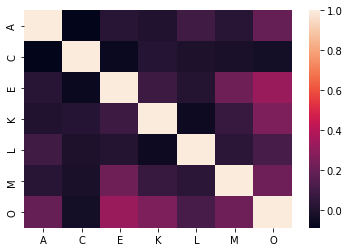

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn import svm


df = pd.read_csv('bench.csv', encoding='latin-1')
 
df = df[:500]
    
df.dropna(inplace= True)
print ("df Shape: ", df.shape)


#Generating the correlation matrix
corr = df.corr()

#Generating the correlation heat-map
sns.heatmap(corr)

print(corr)

In [2]:
df = pd.get_dummies(df)
labels = np.array(df['O'])
df= df.drop('O', axis = 1)
df_list = list(df.columns)

train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.2, random_state = 42)

print ("Train_x Shape: ",train_x.shape)
print ("Train_y Shape: ", train_y.shape)
print ("Test_x Shape: ", test_x.shape)
print ("Test_y Shape: ", test_y.shape)

Train_x Shape:  (400, 89)
Train_y Shape:  (400,)
Test_x Shape:  (100, 89)
Test_y Shape:  (100,)


In [3]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(train_x,train_y)

#Predict the response for test dataset
y_pred1 = clf.predict(test_x)
y_pred_prob = clf.predict_proba(test_x)[:,1]

print(confusion_matrix(test_y, y_pred1))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred1))
print ("AUC Score:", roc_auc_score(test_y, y_pred1))
print ("AUC Score prob:", roc_auc_score(test_y, y_pred_prob))
print ("Precision:", precision_score(test_y, y_pred1))
print ("Recall:", recall_score(test_y, y_pred1))
print ("F1 Score:", f1_score(test_y, y_pred1))


[[66 13]
 [12  9]]
Accuracy: 0.75
AUC Score: 0.6320072332730561
AUC Score prob: 0.6320072332730561
Precision: 0.4090909090909091
Recall: 0.42857142857142855
F1 Score: 0.4186046511627907


In [4]:
rfc = RandomForestClassifier(n_estimators=100, max_features=10)

rfc = rfc.fit(train_x,train_y)

#Predict the response for test dataset
y_pred3 = rfc.predict(test_x)

y_pred_prob = rfc.predict_proba(test_x)[:,1]

print(confusion_matrix(test_y, y_pred3))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred3))
print ("AUC Score:", roc_auc_score(test_y, y_pred3))
print ("AUC Score prob:", roc_auc_score(test_y, y_pred_prob))
print ("Precision:", precision_score(test_y, y_pred3))
print ("Recall:", recall_score(test_y, y_pred3))
print ("F1 Score:", f1_score(test_y, y_pred3))


[[72  7]
 [ 8 13]]
Accuracy: 0.85
AUC Score: 0.7652200120554551
AUC Score prob: 0.863170584689572
Precision: 0.65
Recall: 0.6190476190476191
F1 Score: 0.6341463414634146


In [ ]:
svcf = svm.SVC(kernel='linear', probability=True)
svcf.fit(train_x,train_y)
y_pred = svcf.predict(test_x)

y_pred_prob = svcf.predict_proba(test_x)[:,1]

print(confusion_matrix(test_y, y_pred))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print ("AUC Score:", roc_auc_score(test_y, y_pred))
print ("AUC Score prob:", roc_auc_score(test_y, y_pred_prob))
print ("Precision:", precision_score(test_y, y_pred))
print ("Recall:", recall_score(test_y, y_pred))
print ("F1 Score:", f1_score(test_y, y_pred))

In [ ]:
svcf = svm.LinearSVC()
svcf.fit(train_x,train_y)
y_pred = svcf.predict(test_x)

print(confusion_matrix(test_y, y_pred))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print ("AUC Score:", roc_auc_score(test_y, y_pred))
print ("Precision:", precision_score(test_y, y_pred))
print ("Recall:", recall_score(test_y, y_pred))
print ("F1 Score:", f1_score(test_y, y_pred))

In [ ]:
svcf = svm.SVC(kernel='linear', C=0.1, probability=True)
svcf.fit(train_x,train_y)
y_pred = svcf.predict(test_x)

y_pred_prob = svcf.predict_proba(test_x)[:,1]

print(confusion_matrix(test_y, y_pred))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print ("AUC Score:", roc_auc_score(test_y, y_pred))
print ("AUC Score prob:", roc_auc_score(test_y, y_pred_prob))
print ("Precision:", precision_score(test_y, y_pred))
print ("Recall:", recall_score(test_y, y_pred))
print ("F1 Score:", f1_score(test_y, y_pred))

In [ ]:
svcf = svm.SVC(kernel='poly', probability=True)
svcf.fit(train_x,train_y)
y_pred = svcf.predict(test_x)

y_pred_prob = svcf.predict_proba(test_x)[:,1]

print(confusion_matrix(test_y, y_pred))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print ("AUC Score:", roc_auc_score(test_y, y_pred))
print ("AUC Score prob:", roc_auc_score(test_y, y_pred_prob))
print ("Precision:", precision_score(test_y, y_pred))
print ("Recall:", recall_score(test_y, y_pred))
print ("F1 Score:", f1_score(test_y, y_pred))

In [ ]:
svcf = svm.SVC(kernel='rbf', probability=True)
svcf.fit(train_x,train_y)
y_pred = svcf.predict(test_x)

y_pred_prob = svcf.predict_proba(test_x)[:,1]

print(confusion_matrix(test_y, y_pred))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print ("AUC Score:", roc_auc_score(test_y, y_pred))
print ("AUC Score prob:", roc_auc_score(test_y, y_pred_prob))
print ("Precision:", precision_score(test_y, y_pred))
print ("Recall:", recall_score(test_y, y_pred))
print ("F1 Score:", f1_score(test_y, y_pred))